# Bike Sharing Assignment

Target Variable - 'cnt'

# Reading the data

In [224]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [162]:
# reading the csv file

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [163]:
# checking the shape of the data

df.shape

(730, 16)

In [164]:
# checking the columns

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [166]:
# in the above we can see there are 0 null values, checking once again

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Preparing the data

#### Renaming some columns

In [167]:
df.rename(columns = {'yr' : 'year', 'mnth' : 'month', 'hum' : 'humidity', 'cnt' : 'count', 'dteday' : 'date'}, inplace = True)

In [168]:
# checking the dataset 

df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [169]:
# drop duplicates

df.drop_duplicates(inplace = True)

In [170]:
df.shape

# the shape remained same so, there were no duplicates.

(730, 16)

#### Dropping unnecessary columns

In [171]:
# 'instant' is just an index, it have no effect on the target variable.
# 'count' is sum of 'casual' & 'registered', we don't need those.
# 'date' for this we have year	month	holiday	weekday	workingday

df.drop(['instant', 'date', 'casual', 'registered'], axis = 1, inplace = True)

In [172]:
# checking the dataset 

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Encoding values

In [173]:
# seeing values in season 

df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [174]:
# encoding according to data dictionary

df.season = df.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [175]:
# seeing values in month 

df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [176]:
# encoding according to data dictionary

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [177]:
# seeing values in weekday 

df.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [178]:
# encoding according to data dictionary

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [179]:
# seeing values in weathersit 

df.weathersit.unique()

array([2, 1, 3], dtype=int64)

In [180]:
# encoding according to data dictionary

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [181]:
# checking the dataset 

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


In [183]:
df.describe

<bound method NDFrame.describe of      season  year month  holiday weekday  workingday weathersit       temp  \
0    spring     0   jan        0     sat           0      Misty  14.110847   
1    spring     0   jan        0     sun           0      Misty  14.902598   
2    spring     0   jan        0     mon           1      Clear   8.050924   
3    spring     0   jan        0     tue           1      Clear   8.200000   
4    spring     0   jan        0     wed           1      Clear   9.305237   
..      ...   ...   ...      ...     ...         ...        ...        ...   
725  spring     1   dec        0     thu           1      Misty  10.420847   
726  spring     1   dec        0     fri           1      Misty  10.386653   
727  spring     1   dec        0     sat           0      Misty  10.386653   
728  spring     1   dec        0     sun           0      Clear  10.489153   
729  spring     1   dec        0     mon           1      Misty   8.849153   

        atemp  humidity  wind

# Visualising the data

## Visualising Categorical columns

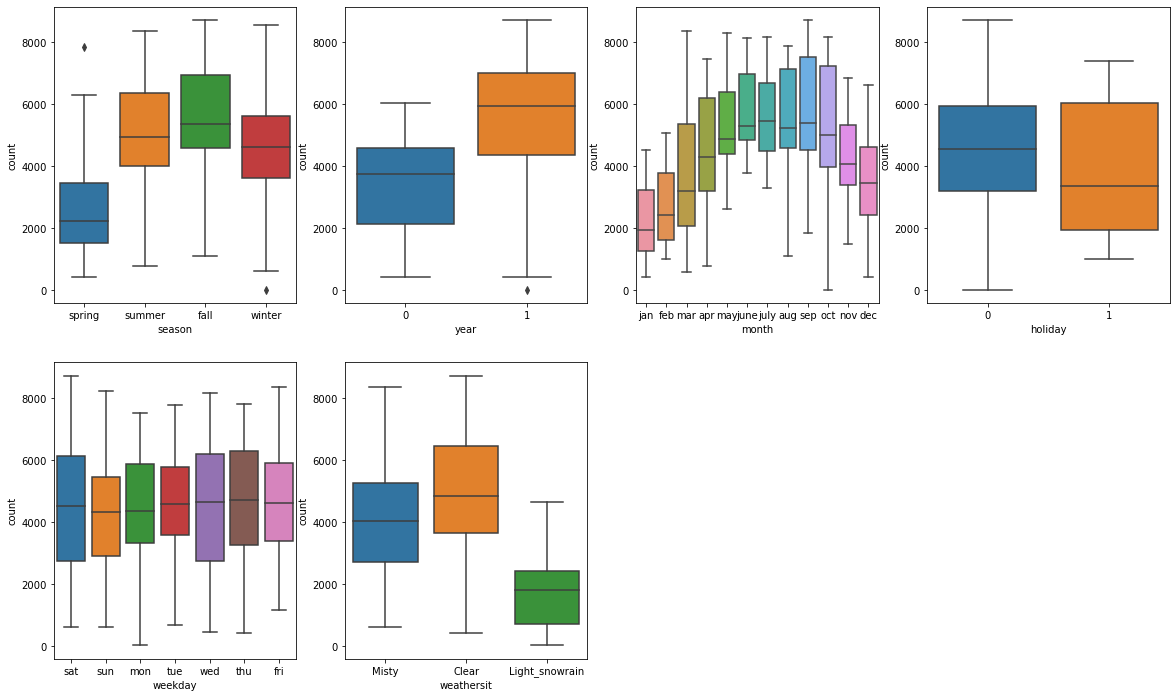

In [184]:
plt.figure(figsize = (20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = df)

plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'count', data = df)

plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = df)

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'count', data = df)

plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = df)

plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'count', data = df)

plt.show()

In [185]:
# defining a function to plot bar charts for categorical values

def plot_cat_columns(col):
    plt.figure(figsize = (12,8))
    plt.subplot(1,2,1)
    sns.barplot(x = col, y = 'count', data = df)
    plt.subplot(1,2,2)
    ax = sns.barplot(x = col, y = 'count', data = df, hue = 'year')
    labels=['2018', '2019']
    h, l = ax.get_legend_handles_labels()
    ax.legend(h, labels, title="Year")
    plt.show()

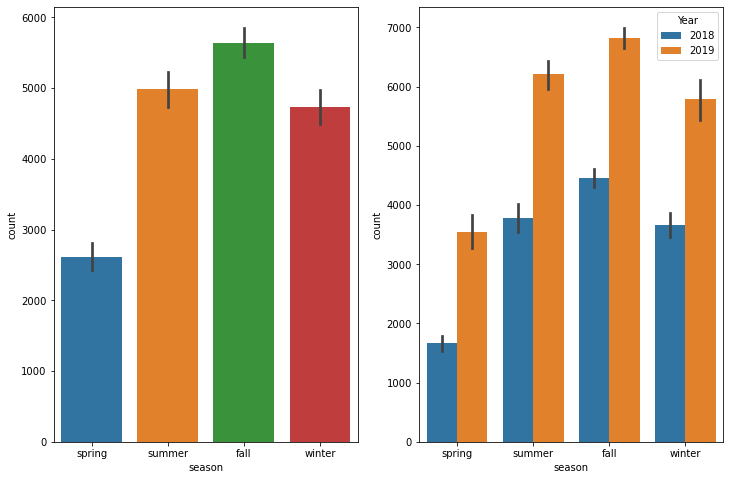

In [186]:
# season column visualization

plot_cat_columns('season')

#### Observation

There is significant increase in count from the year 2018 to 2019. Fall season has the maximum count.

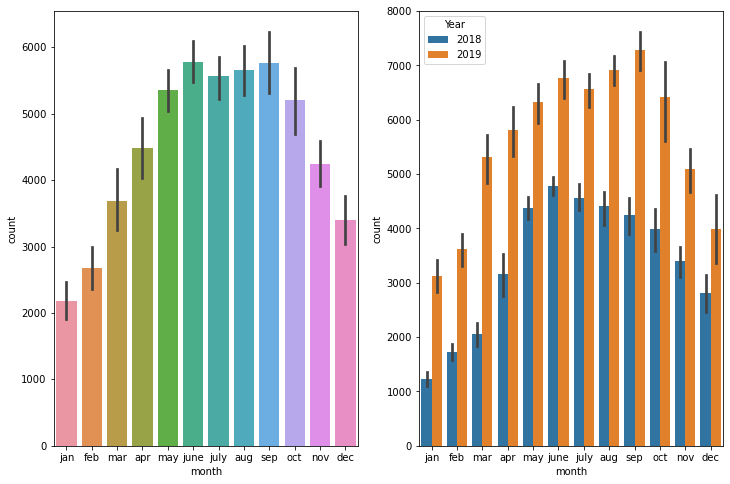

In [187]:
# month column visualization

plot_cat_columns('month')

#### Observation

There is significant increase in count from the year 2018 to 2019 per month. Months of May, June, July, Aug, Spet have the maximum count. Count increases from beginning of year to year end.

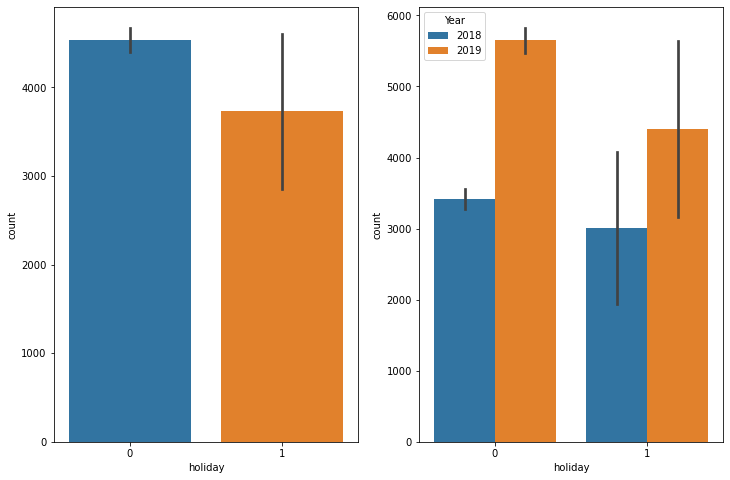

In [188]:
# holiday column visualization

plot_cat_columns('holiday')

#### Observation

Count on holidays is comparitively lesser. Again count is more in 2019 compared to 2018.

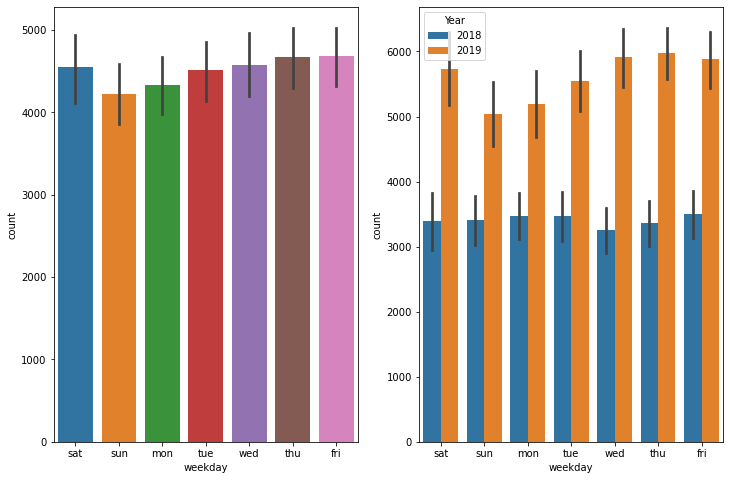

In [189]:
# weekday column visualization

plot_cat_columns('weekday')

#### Observation

There is no clear difference between the days of the week but there is more count in 2019 compared to 2018.

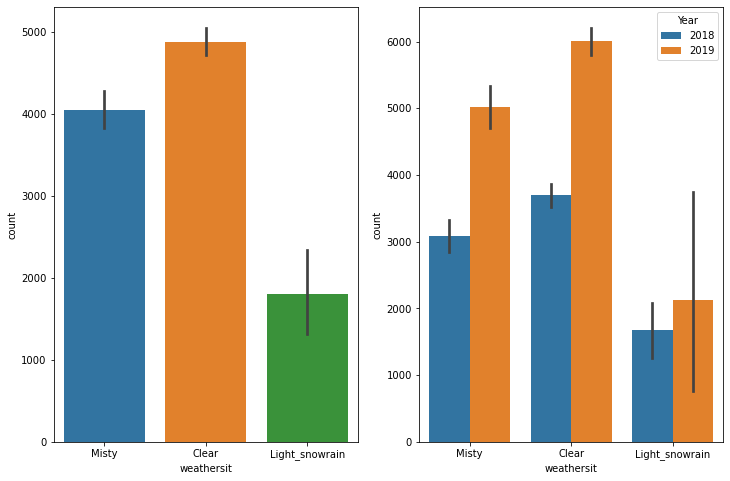

In [190]:
# weathersit column visualization

plot_cat_columns('weathersit')

#### Observation

Most number of bookings on clear days, followed by Misty, least on days with snow or rain. There is more count in 2019 compared to 2018.

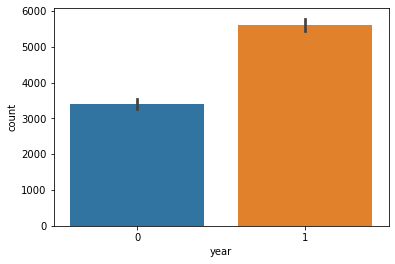

In [191]:
# visualizing year column

sns.barplot( x = 'year', y = 'count', data = df)
plt.show()

#### Observation

As shown in the trend of the previous categorical columns as well, the count is more in 2019 compared to 2018.

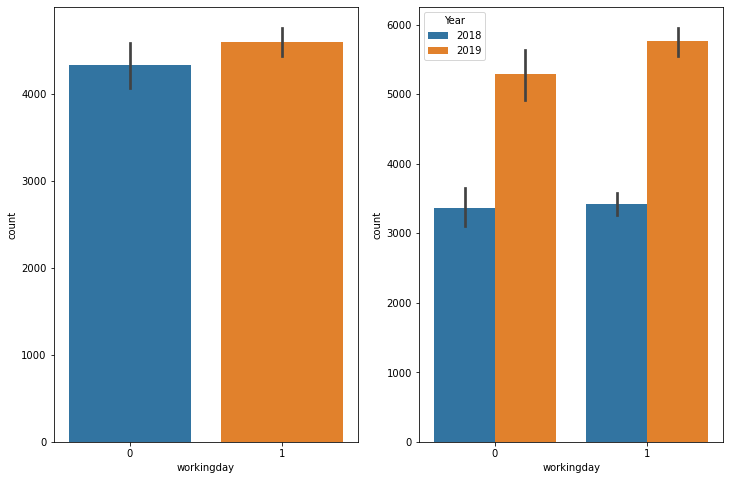

In [192]:
# visualizing workingday column

plot_cat_columns('workingday')

## Visualising Numerical columns

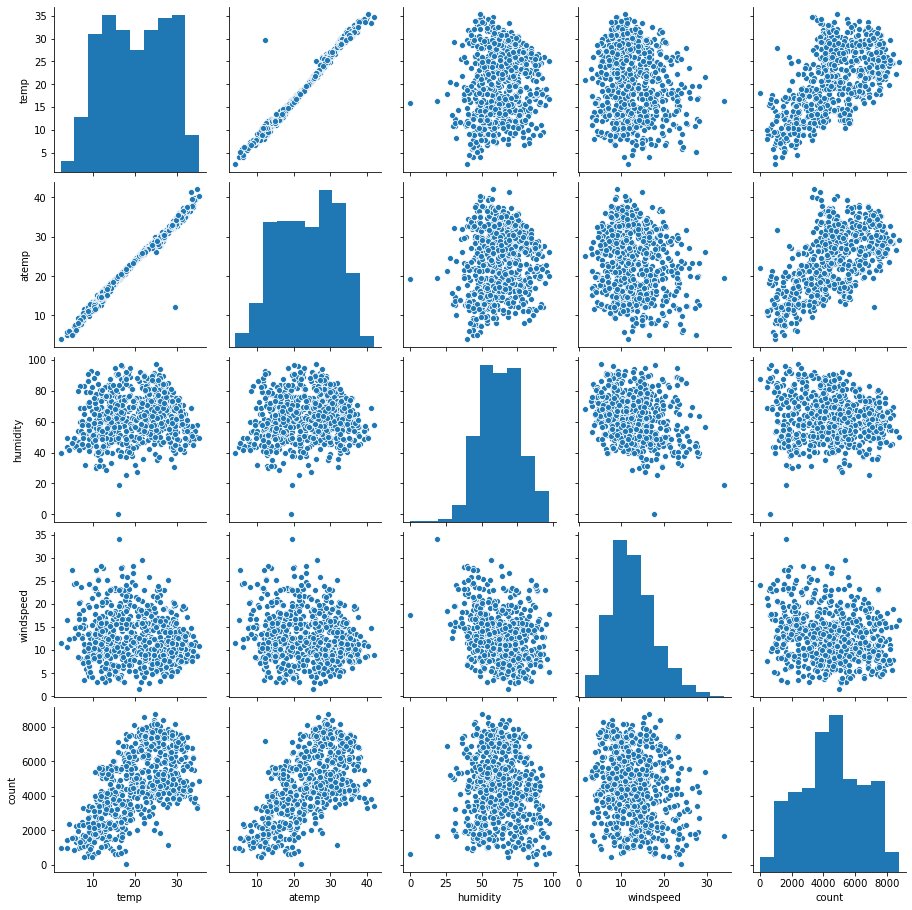

In [193]:
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','count'])
plt.show()

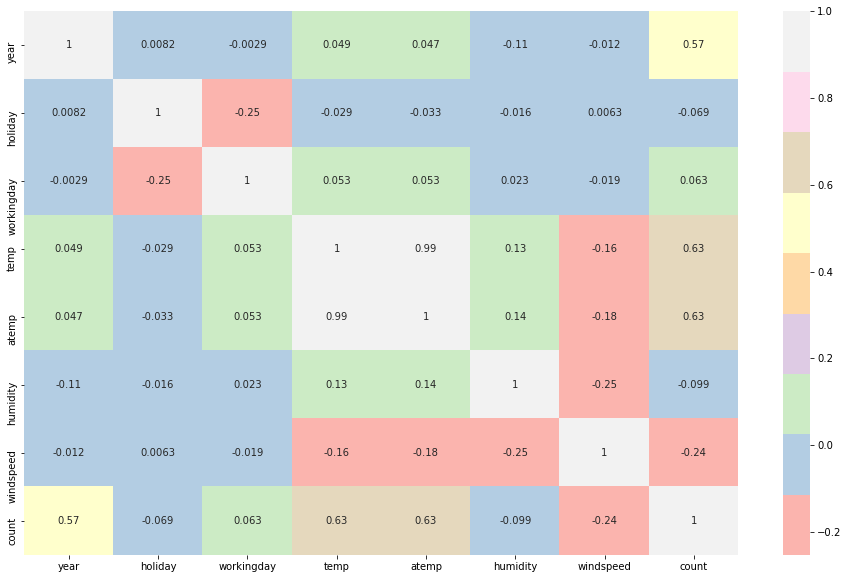

In [194]:
# heatmap

plt.figure( figsize = (16,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Pastel1')
plt.show()

#### Observation

There is linear relationship for temp & atemp with a high correlation of 0.99 between them. They also have the same correlation with count as 0.63. We cannot use both, we will pick 1 to use based on VIF and p-value. Windspeed shows almost no relationship with count both in the graph and very small negative correlation.

# Data Preparation

In [195]:
# creating dummy variable for season

seasons_df = pd.get_dummies(df.season, drop_first = True)
seasons_df.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [196]:
# similarly creating dummy variables for months, weeekdays, weathersit

months_df = pd.get_dummies(df.month, drop_first = True)
weekdays_df = pd.get_dummies(df.weekday, drop_first = True)
weathersit_df = pd.get_dummies(df.weathersit, drop_first = True)

In [197]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [198]:
# merge dummy vars with dataset

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [199]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 94.1+ KB


In [201]:
# drop old categorical vars

df_new.drop(['season', 'month', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [202]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [203]:
df_new.shape

(730, 30)

In [204]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   count           730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

## Split data into train and test data

In [205]:
# splitting data frame into train and test

df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [206]:
# checking shape of test & train

print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


# Scaling the data

In [207]:
scaler = MinMaxScaler()

In [208]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [209]:
# list of numerical variables

num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

In [210]:
# fitting scaler on training data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [211]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


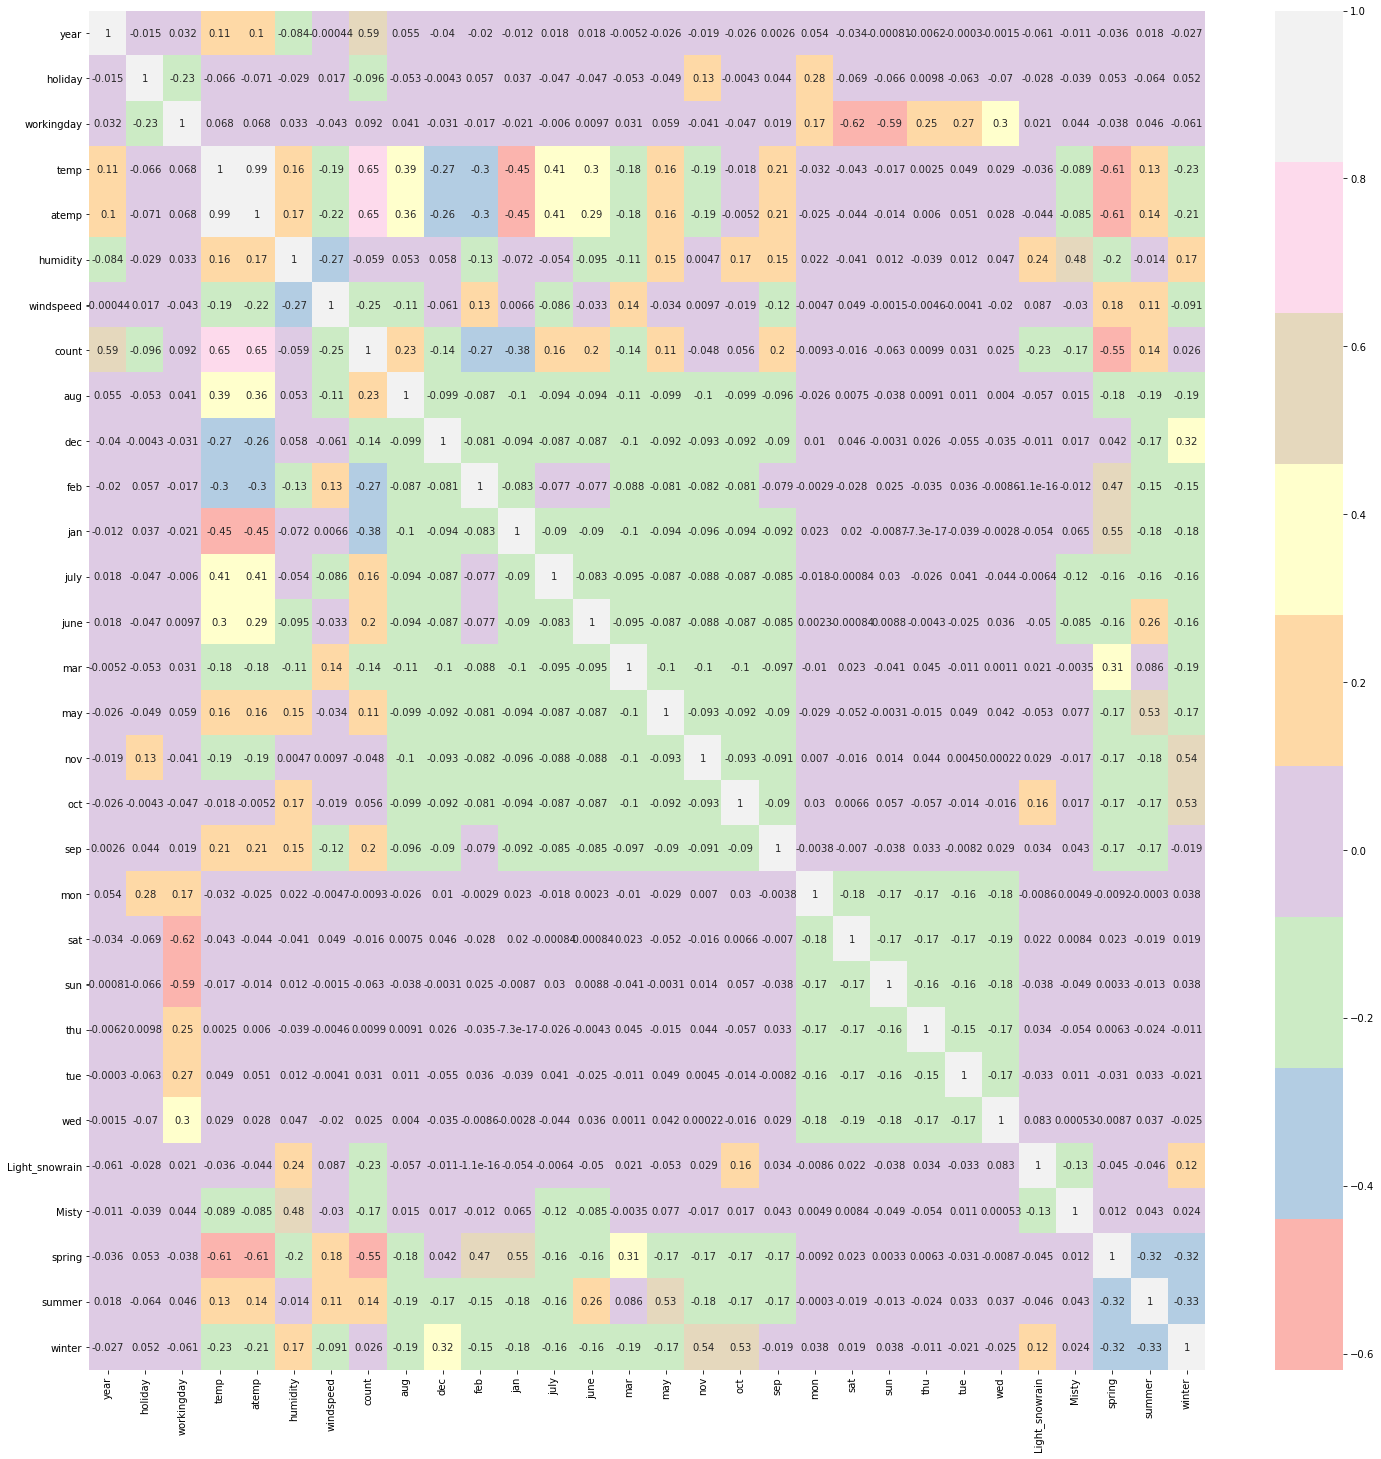

In [212]:
# heatmap

plt.figure( figsize = (25,25))
# matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="Pastel1")
plt.show()

#### Observations

There is correlation between : 
- count with variables year & temp.
- spring season with jan & feb
- summer with may
- winster with oct & nov
- misty and humidity

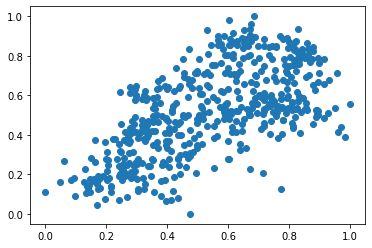

In [213]:
# visualising count and temp

plt.scatter(x = df_train['temp'], y = df_train['count'])
plt.show()

This confirms positive correlation between temperature and count

# Building the linear model

In [214]:
y_train = df_train.pop('count') # Return item and drop from frame
X_train = df_train

In [215]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

In [216]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### Recusrive Feature ELimination (RFE)

In [218]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [220]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [221]:
# see selected columns

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [223]:
# see rejected columns

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [226]:
vif = pd.DataFrame()
print(vif)

Empty DataFrame
Columns: []
Index: []


In [227]:
# function for VIF calculation

def calculateVIF(df):
    vif = pd.DataFrame() #create empty dataframe
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [230]:
# new dataframe with RFE selected variables

X_train_rfe = X_train[ X_train.columns[rfe.support_]]
X_train_rfe.head()

,year,holiday,workingday,temp,humidity,windspeed,jan,july,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0


In [231]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,sat,1.98


#### Observation

Humidity has the highest VIF value followed by temp and workingday. VIF values higher than 5 are cause for concern. We will drop in order of decreasing VIF.

### Building 1st Linear Regression Model

In [233]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train, X_train_lm1).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          4.22e-191
Time:                        17:11:04   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.969      0.000       0.181       0.323
year               0.2305      0.008     28.795      0.000       0.215       0.246
holiday           -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday         0.0433      0.012      3.762      0.000       0.021       0.066
temp               0.5096      0.034     14.837      0.000       0.442       0.577
humidity          -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed         -0.1863      0.025     -7.310      0.000      -0.236      -0.136
jan               -0.0345      0.017     -1.989      0.047      -0.069      -0.000
july              -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sep                0.0814      0.016      4.945      0.000       0.049       0.114
sat                0.0536      0.014      3.694      0.000       0.025       0.082
Light_snowrain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Misty             -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring            -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer             0.0508      0.015      3.423      0.001       0.022       0.080
winter             0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping Humidity

In [234]:
X_train_new = X_train_rfe.drop('humidity', axis = 1)

# calculate VIF again

calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


#### Observation

Now VIF values for all variables are within 10. We will drop in order of decreasing VIF if required again.

### Building 2nd Linear Regression Model

In [236]:
X_train_lm2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train, X_train_lm2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.60e-188
Time:                        17:20:24   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.520      0.000       0.112       0.235
year               0.2345      0.008     29.009      0.000       0.219       0.250
holiday           -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday         0.0464      0.012      3.966      0.000       0.023       0.069
temp               0.4722      0.034     14.005      0.000       0.406       0.538
windspeed         -0.1563      0.025     -6.286      0.000      -0.205      -0.107
jan               -0.0392      0.018     -2.227      0.026      -0.074      -0.005
july              -0.0479      0.018     -2.614      0.009      -0.084      -0.012
sep                0.0755      0.017      4.527      0.000       0.043       0.108
sat                0.0583      0.015      3.968      0.000       0.029       0.087
Light_snowrain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Misty             -0.0813      0.009     -9.437      0.000      -0.098      -0.064
spring            -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer             0.0445      0.015      2.967      0.003       0.015       0.074
winter             0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observation

- R squared has barely decreased which means the variable humidity was insignificant.
- F-statistic has increased which means the model is getting better.
- Compared to other variables 'jan' has high p-value & high VIF.
- Dropping this next.

#### Dropping Jan

In [237]:
X_train_new = X_train_new.drop('jan', axis = 1)

calculateVIF(X_train_new)

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,spring,2.49
11,summer,2.34
0,year,2.07
12,winter,1.98
7,sat,1.96
5,july,1.58
9,Misty,1.57


#### Observation

- We do not see much change in VIF after dropping jan.

### Building 3rd Linear Regression Model

In [239]:
X_train_lm3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train, X_train_lm3).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.28e-188
Time:                        17:27:32   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1576      0.031      5.126      0.000       0.097       0.218
year               0.2337      0.008     28.828      0.000       0.218       0.250
holiday           -0.0567      0.027     -2.069      0.039      -0.111      -0.003
workingday         0.0461      0.012      3.931      0.000       0.023       0.069
temp               0.4915      0.033     15.027      0.000       0.427       0.556
windspeed         -0.1491      0.025     -6.024      0.000      -0.198      -0.100
july              -0.0496      0.018     -2.702      0.007      -0.086      -0.014
sep                0.0759      0.017      4.537      0.000       0.043       0.109
sat                0.0579      0.015      3.924      0.000       0.029       0.087
Light_snowrain    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
Misty             -0.0822      0.009     -9.514      0.000      -0.099      -0.065
spring            -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer             0.0477      0.015      3.180      0.002       0.018       0.077
winter             0.0846      0.017      4.971      0.000       0.051       0.118
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observation

- R squared has barely decreased which means the variable 'jan' was insignificant.
- F-statistic has increased which means the model is getting better.
- Compared to other variables 'july' has high p-value & high VIF.
- Dropping this next.

#### Dropping july

In [241]:
X_train_new = X_train_new.drop('july', axis = 1)

calculateVIF(X_train_new)

,Features,VIF
3,temp,5.70
2,workingday,5.20
4,windspeed,4.65
9,spring,2.40
0,year,2.07
10,summer,2.01
6,sat,1.96
11,winter,1.83
8,Misty,1.57
5,sep,1.24


#### Observation

- We do not see much change in VIF after dropping july.

### Building 4th Linear Regression Model

In [244]:
X_train_lm4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train, X_train_lm4).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.16e-188
Time:                        17:36:10   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -927.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1484      0.031      4.827      0.000       0.088       0.209
year               0.2342      0.008     28.718      0.000       0.218       0.250
holiday           -0.0547      0.028     -1.982      0.048      -0.109      -0.000
workingday         0.0474      0.012      4.016      0.000       0.024       0.071
temp               0.4789      0.033     14.699      0.000       0.415       0.543
windspeed         -0.1492      0.025     -5.990      0.000      -0.198      -0.100
sep                0.0894      0.016      5.559      0.000       0.058       0.121
sat                0.0585      0.015      3.942      0.000       0.029       0.088
Light_snowrain    -0.2904      0.025    -11.844      0.000      -0.339      -0.242
Misty             -0.0809      0.009     -9.318      0.000      -0.098      -0.064
spring            -0.0543      0.021     -2.644      0.008      -0.095      -0.014
summer             0.0625      0.014      4.456      0.000       0.035       0.090
winter             0.0968      0.017      5.863      0.000       0.064       0.129
==============================================================================
Omnibus:                       70.944   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.372
Skew:                          -0.729   Prob(JB):                     2.74e-37
Kurtosis:                       5.408   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observation

- R squared has barely decreased which means the variable 'july' was insignificant.
- F-statistic has increased which means the model is getting better.
- Compared to other variables 'spring' has high p-value & high VIF.
- Dropping this next.

#### Dropping spring

In [245]:
# Dropping spring

X_train_new = X_train_new.drop('spring', axis = 1)

calculateVIF(X_train_new)

,Features,VIF
3,temp,4.84
2,workingday,4.35
4,windspeed,3.55
0,year,2.02
6,sat,1.76
9,summer,1.57
8,Misty,1.53
10,winter,1.41
5,sep,1.21
1,holiday,1.12


#### Observation

- After dropping spring, all the VIF values are below 5.

### Building 5th Linear Regression Model

In [247]:
X_train_lm5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train, X_train_lm5).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.43e-188
Time:                        17:43:38   Log-Likelihood:                 500.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     498   BIC:                            -927.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0845      0.019      4.420      0.000       0.047       0.122
year               0.2330      0.008     28.443      0.000       0.217       0.249
holiday           -0.0567      0.028     -2.044      0.041      -0.111      -0.002
workingday         0.0477      0.012      4.020      0.000       0.024       0.071
temp               0.5477      0.020     27.797      0.000       0.509       0.586
windspeed         -0.1542      0.025     -6.175      0.000      -0.203      -0.105
sep                0.0994      0.016      6.319      0.000       0.068       0.130
sat                0.0590      0.015      3.951      0.000       0.030       0.088
Light_snowrain    -0.2884      0.025    -11.695      0.000      -0.337      -0.240
Misty             -0.0805      0.009     -9.225      0.000      -0.098      -0.063
summer             0.0880      0.010      8.572      0.000       0.068       0.108
winter             0.1310      0.010     12.668      0.000       0.111       0.151
==============================================================================
Omnibus:                       64.101   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.736
Skew:                          -0.698   Prob(JB):                     2.03e-30
Kurtosis:                       5.118   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observation

- R squared has barely decreased which means the variable 'spring' was insignificant.
- F-statistic has increased which means the model got better.

### We can consider the above model to be the best as it has all variables VIF value below 5, indicating low multi-collinearity between the predictors and all the p-values are low as well. The model also has a very high F-statistic. This indicates the model is significant.

In [249]:
lr_5.params

const             0.084514
year              0.233003
holiday          -0.056709
workingday        0.047717
temp              0.547700
windspeed        -0.154226
sep               0.099363
sat               0.058986
Light_snowrain   -0.288352
Misty            -0.080511
summer            0.088003
winter            0.130958
dtype: float64

# Residual Analysis

In [250]:
X_train_lm5

,const,year,holiday,workingday,temp,windspeed,sep,sat,Light_snowrain,Misty,summer,winter
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,0,1,0,1,0,0
728,1.0,1,0,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.188475,0,1,0,1,1,0
111,1.0,0,0,1,0.345824,0.380981,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0,0.248216,0.431816,0,1,0,1,0,1
79,1.0,0,0,1,0.462664,0.529881,0,0,0,1,1,0


In [251]:
y_train_pred = lr_5.predict(X_train_lm5)

### Normality of error terms

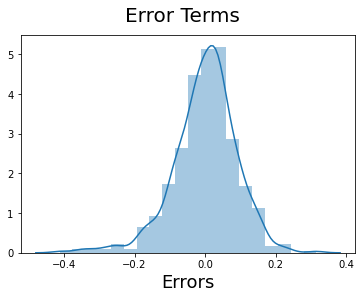

In [254]:
# plot histogram of error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

#### Observation

- Error terms are following normal distribution

### Multi Collinearity

In [255]:
calculateVIF(X_train_new)

,Features,VIF
3,temp,4.84
2,workingday,4.35
4,windspeed,3.55
0,year,2.02
6,sat,1.76
9,summer,1.57
8,Misty,1.53
10,winter,1.41
5,sep,1.21
1,holiday,1.12


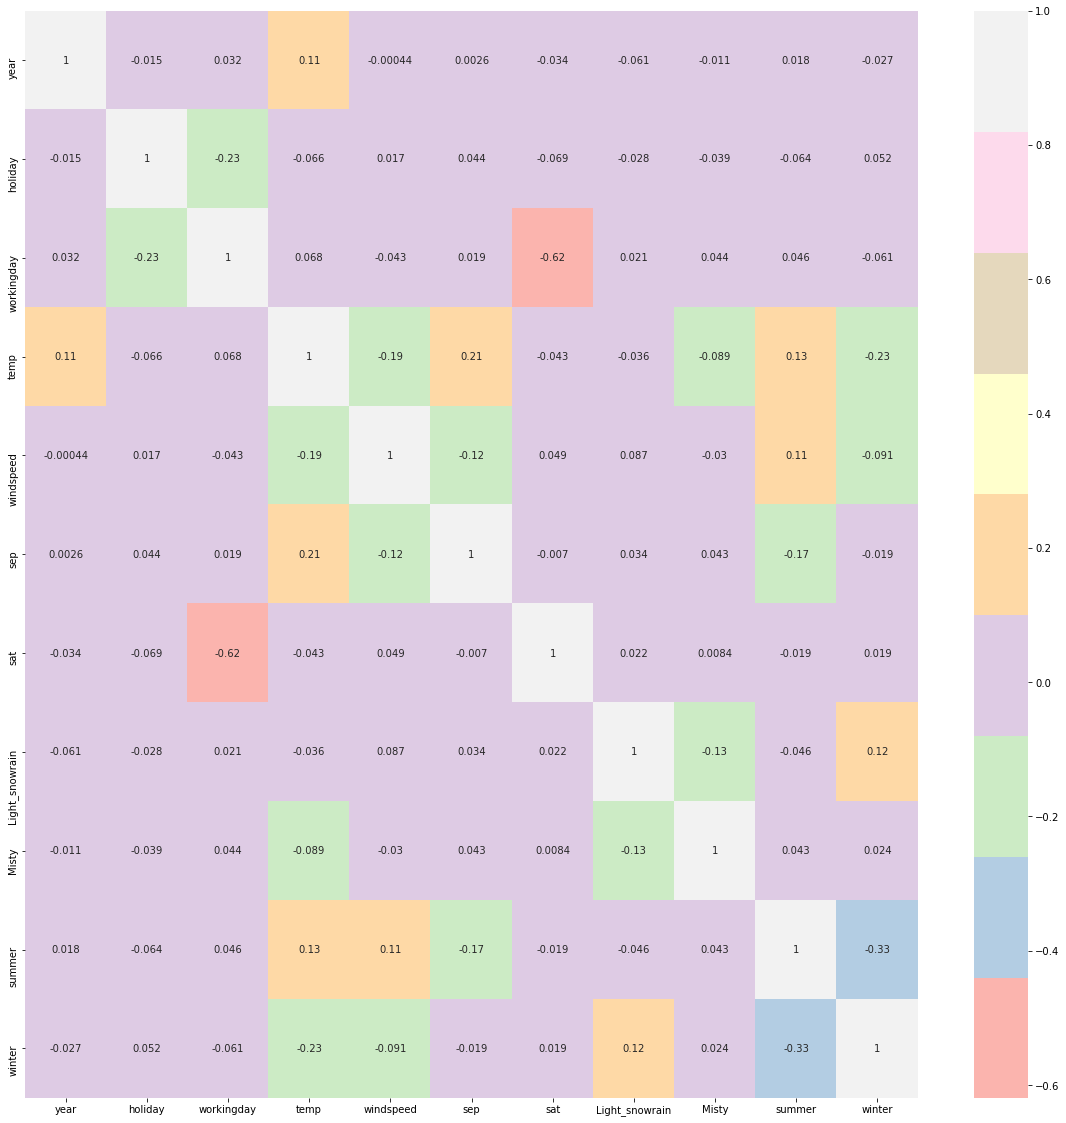

In [261]:
plt.figure(figsize = (20,20))
sns.heatmap(X_train_new.corr(), cmap = 'Pastel1', annot = True)
plt.show()

#### Observation

- VIF values are less than 5
- very low correlation from heatmap

### Linearity

The CCPR (Component and component plus residual) plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables.

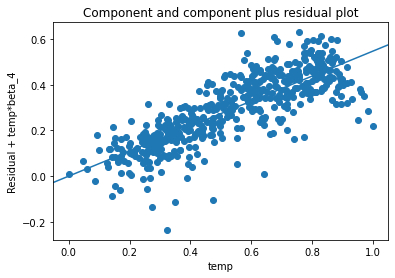

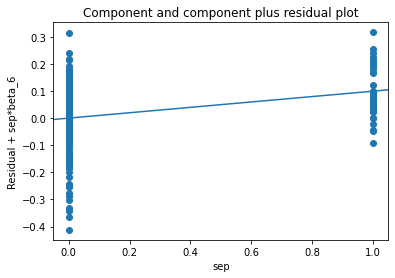

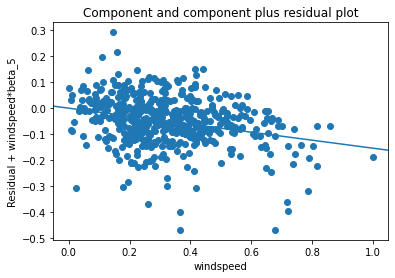

In [297]:
# Linear relationship validation using CCPR plot


sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()


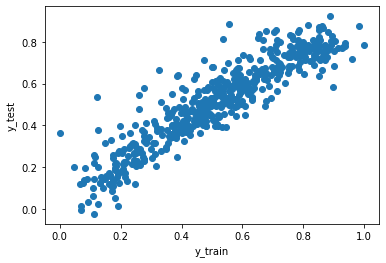

In [300]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('y_train')
plt.ylabel('y_test')
plt.show()

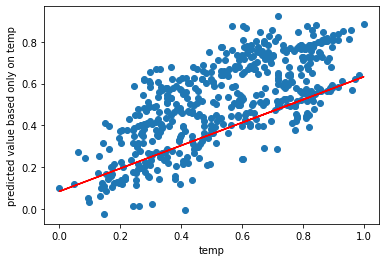

In [301]:
plt.scatter(X_train['temp'], y_train_pred)
plt.plot( X_train['temp'], (0.084514 +  0.547700 * X_train['temp']),'r')
plt.xlabel('temp')
plt.ylabel('predicted value based only on temp')
plt.show()

Linearity can be observed.

### Homoscedasticity

No visible pattern to be observed from plot for residuals.

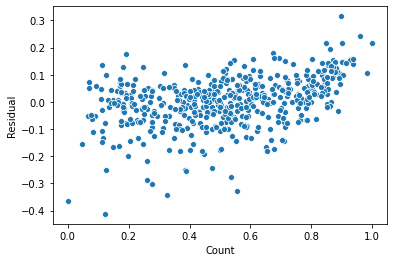

In [304]:
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
# plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Independence of residuals

Durbin-Watson value of final model lr_6 is 2.111, which signifies there is no autocorrelation.

# Predictions using Final Model

In [305]:
# apply scaling on dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [306]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [308]:
y_test = df_test.pop('count')
X_test = df_test

In [311]:
print(y_test.shape)
print(X_test.shape)

(220,)
(220, 29)


In [314]:
# adding constant var to test dataframe

col1 = X_train_new.columns #final columns in training data after RFE

X_test = X_test[col1]

x_test_lm5 = sm.add_constant(X_test)

In [316]:
x_test_lm5.shape

(220, 12)

In [317]:
y_pred = lr_5.predict(x_test_lm5)

In [318]:
y_pred.shape

(220,)

In [319]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7969

# Model Evaluation

Plotting graph between actual vs predicted values

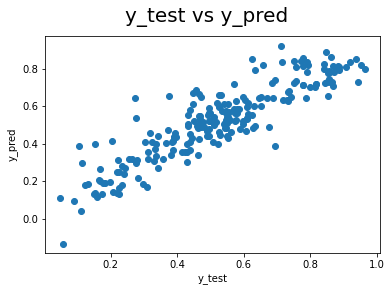

In [322]:
# plotting y_test & y_pred

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10) 
plt.show()

In [324]:
round(lr_5.params, 4)

const             0.0845
year              0.2330
holiday          -0.0567
workingday        0.0477
temp              0.5477
windspeed        -0.1542
sep               0.0994
sat               0.0590
Light_snowrain   -0.2884
Misty            -0.0805
summer            0.0880
winter            0.1310
dtype: float64

#### Equation of our best fitted line is :

count = 0.0845 + 0.2330 * year - 0.0567 * holiday + 0.0477 * workingday + 0.5477 * temp - 0.1542 * windspeed + 0.0994 * sep + 0.0590 * sat - 0.2884 * Light_snowrain - 0.0805 * Misty + 0.0880 * summer + 0.1310 * winter

In [325]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7862


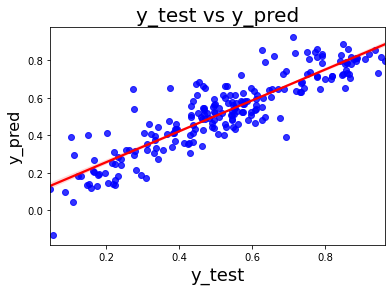

In [326]:
# Visualizing fit on the test data

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


# Comparision between Training and Testing dataset:

- Train Dataset R2 = 0.837
- Test Dataset R2 = 0.7969
- Train Dataset Adjusted R2 = 0.833
- Test Dataset Adjusted R2 = 0.7862

# Final Conclusion

- Demand of bikes depend on the following variables:
    'year', 'holiday', 'workingday', 'temp', 'windspeed', 'sep', 'sat', 'Light_snowrain', 'Misty', 'summer', 'winter'.


- With the equation: 
    
    count = 0.0845 + 0.2330 * year - 0.0567 * holiday + 0.0477 * workingday + 0.5477 * temp - 0.1542 * windspeed + 0.0994 * sep + 0.0590 * sat - 0.2884 * Light_snowrain - 0.0805 * Misty + 0.0880 * summer + 0.1310 * winter